In [1]:
from pathlib import Path
import h5py
import matplotlib.pyplot as plt
import numpy as np
from source.helper import to_dB, print_spectogram, gen_spectogram, \
                          diff_frames, generate_kalman_trajectory, generate_multiple_kalman_trajectories, cut_trajectory_from_spectrogram

In [2]:
BASE_DIR = Path("E:/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r')

sample_file = loaded_file['2023_03_21']['chodzonko_1os_4-1-8m_bartek']
sample_file = sample_file[:, 0, 0, :]
normal_spect, y = gen_spectogram(sample_file)
normal_spect = to_dB(normal_spect)

frames_diff = diff_frames(sample_file, 1)
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)

E:\radar-project\venv\Lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
E:\radar-project\venv\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
E:\radar-project\venv\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


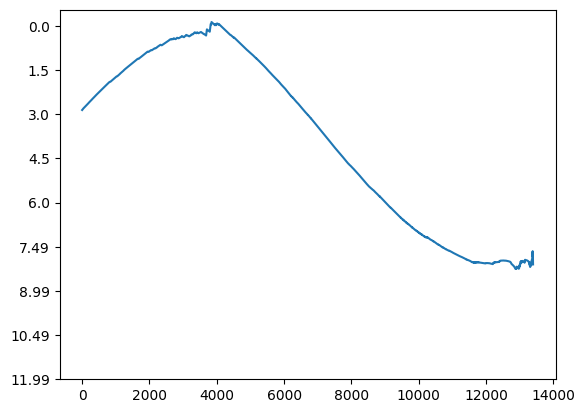

In [3]:
trajectory = generate_kalman_trajectory(diff_spectdb)
plt.plot(trajectory)
plt.yticks(np.arange(start=0, stop=81, step=10), y[:81:10])
plt.gca().invert_yaxis()
plt.show()

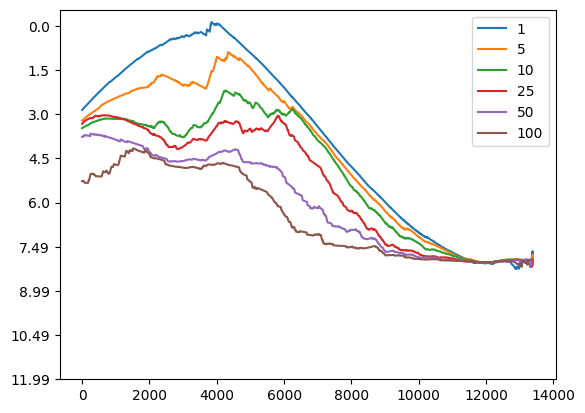

In [4]:
diffs = [1, 5, 10, 25, 50, 100]
trajectories = generate_multiple_kalman_trajectories(sample_file, diffs)

[plt.plot(trajectory, label=diffs[idx]) for idx, trajectory in enumerate(trajectories)]
plt.legend()
plt.yticks(np.arange(start=0, stop=81, step=10), y[:81:10])
plt.gca().invert_yaxis()
plt.show()

In [9]:
cut_trajectory = cut_trajectory_from_spectrogram(normal_spect, trajectories[0])

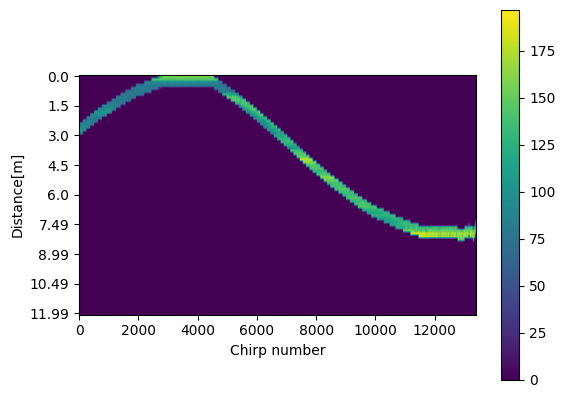

In [10]:
print_spectogram(cut_trajectory, y, depth_limit=12)